In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import mplhep as hep
hep.style.use('ATLAS')
import os

# 导入实验数据

In [2]:
def read_pion_spectra_data(file_path, centrality, particle_type):
    """
    读取d+Au碰撞的pion spectra数据，根据中心度和粒子类型选择
    
    参数:
        file_path: 文件路径
        centrality: 中心度范围，如"0-20%", "20-40%", "40-60%", "60-88%", "0-100%"
        particle_type: 粒子类型，如"π+", "π-"
    
    返回:
        DataFrame包含列:
        pT, pT_low, pT_high, Yields, stat_plus, stat_minus, sys_plus, sys_minus
    """
    # 定义不同数据块的行号范围
    data_blocks = {
        "0-20%":  {"pion/proton-": (8,   32), "pion/proton+": (143, 167), "kaon-": (8,   29), "kaon+": (128, 148)},
        "20-40%": {"pion/proton-": (62,  86), "pion/proton+": (196, 220), "kaon-": (56,  77), "kaon+": (176, 197)},
        "40-60%": {"pion/proton-": (89, 113), "pion/proton+": (223, 247), "kaon-": (80, 101), "kaon+": (200, 221)},
        "60-88%": {"pion/proton-": (116,140), "pion/proton+": (250, 274), "kaon-": (104,125), "kaon+": (224, 245)},
        "0-100%": {"pion/proton-": (35,  59), "pion/proton+": (169, 193), "kaon-": (32,  53), "kaon+": (152, 173)},
    }
    
    # 获取对应的行号范围
    try:
        start_row, end_row = data_blocks[centrality][particle_type]
    except KeyError:
        raise ValueError(f"无效的中心度或粒子类型。可用选项: 中心度{list(data_blocks.keys())}, 粒子类型{['+', '-']}")
    
    # 读取数据
    df = pd.read_csv(
        file_path,
        skiprows=start_row,
        nrows=end_row - start_row,
        header=None
    )
    
    # 列命名
    df.columns = [
        'pT', 'pT_low', 'pT_high', 'Yields', 
        'stat_plus', 'stat_minus', 'sys_plus', 'sys_minus'
    ]
    
    # 数据清洗
    df = df.dropna()
    df = df.apply(pd.to_numeric, errors='coerce')
    
    return df



In [3]:
pion_file_path = './data/HEPData_dAu_spectra_pion.csv'
pion_plus_0_20 = read_pion_spectra_data(pion_file_path, "0-20%", "pion/proton+")
pion_plus_20_40 = read_pion_spectra_data(pion_file_path, "20-40%", "pion/proton+")
pion_plus_40_60 = read_pion_spectra_data(pion_file_path, "40-60%", "pion/proton+")
pion_plus_60_88 = read_pion_spectra_data(pion_file_path, "60-88%", "pion/proton+")
pion_plus_0_100 = read_pion_spectra_data(pion_file_path, "0-100%", "pion/proton+")

In [4]:
proton_file_path = './data/HEPData_dAu_spectra_proton.csv'
proton_plus_0_20 = read_pion_spectra_data(proton_file_path, "0-20%", "pion/proton+")
proton_plus_20_40 = read_pion_spectra_data(proton_file_path, "20-40%", "pion/proton+")
proton_plus_40_60 = read_pion_spectra_data(proton_file_path, "40-60%", "pion/proton+")
proton_plus_60_88 = read_pion_spectra_data(proton_file_path, "60-88%", "pion/proton+")
proton_plus_0_100 = read_pion_spectra_data(proton_file_path, "0-100%", "pion/proton+")

In [5]:
kaon_file_path = './data/HEPData_dAu_spectra_kaon.csv'
kaon_plus_0_20 = read_pion_spectra_data(kaon_file_path, "0-20%", "kaon+")
kaon_plus_20_40 = read_pion_spectra_data(kaon_file_path, "20-40%", "kaon+")
kaon_plus_40_60 = read_pion_spectra_data(kaon_file_path, "40-60%", "kaon+")
kaon_plus_60_88 = read_pion_spectra_data(kaon_file_path, "60-88%", "kaon+")
kaon_plus_0_100 = read_pion_spectra_data(kaon_file_path, "0-100%", "kaon+")

In [6]:
pion_plus_0_20

,pT,pT_low,pT_high,Yields,stat_plus,stat_minus,sys_plus,sys_minus
0,0.55,0.5,0.6,1.538340,0.020451,-0.020451,0.123067,-0.123067
1,0.65,0.6,0.7,0.997427,0.012528,-0.012528,0.079794,-0.079794
2,0.75,0.7,0.8,0.657201,0.008032,-0.008032,0.052576,-0.052576
3,0.85,0.8,0.9,0.432589,0.005129,-0.005129,0.034607,-0.034607
4,0.95,0.9,1.0,0.281464,0.003296,-0.003296,0.022517,-0.022517
5,1.05,1.0,1.1,0.192231,0.002238,-0.002238,0.015378,-0.015378
6,1.15,1.1,1.2,0.133400,0.001575,-0.001575,0.010672,-0.010672
7,1.25,1.2,1.3,0.094917,0.001134,-0.001134,0.007593,-0.007593
8,1.35,1.3,1.4,0.066837,0.000800,-0.000800,0.005347,-0.005347
9,1.45,1.4,1.5,0.046932,0.000559,-0.000559,0.003755,-0.003755


In [7]:
def plot_pt_spectrum(data_exp, m=0, n=20, pid=321, ylog=True):
    """
    绘制pT谱图，比较模拟结果和实验数据
    
    参数:
        data_exp : 实验数据的DataFrame或数组，包含'pT'和'Yields'列
        m, n : 模拟参数
        pid : 粒子ID (211:π⁺, 2212:p, 321:K⁺)
        ylog : 是否使用对数y轴
    """
    # 根据PID设置粒子名称和标签
    particle_info = {
        211: {'symbol': r'\pi^+', 'name': 'pion'},
        2212: {'symbol': 'p', 'name': 'proton'},
        321: {'symbol': 'K^+', 'name': 'kaon'}
    }
    
    # 获取当前粒子的信息
    particle = particle_info.get(pid, {'symbol': f'PID{pid}', 'name': f'PID{pid}'})
    
    # 自动生成所有标签
    label_clvisc = ' CLVisc'
    label_exp = 'PHENIX'
    title = rf'd+Au $\sqrt{{\rm s_{{\rm NN}}}}$=200 Gev {m}-{n}%, for ${particle["symbol"]}$'
    xlabel = r'$p_T$ [GeV]'
    ylabel = r'$\rm d^2N/2\pi p_T dp_T dY$ $[Gev^{-2}]$'
    
    # 设置基础路径和bin参数
    base_path = "/media/mengzhu/west16/d_Au_work/d_Au_DWF/hydro_result_n_BC/ebe_mc_nsampling_2000/plat_1p3_gw_1p3/entropy3D_y0_4p0_sigma_2p5_L_factor_2p0_R_factor_2p0_P_factor_5p5_alpha_1p0_beta_0p35/dAu200"
    bin_edges = np.linspace(0, 3, 31)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  
    
    event_start = 0
    event_end = 999
    # 初始化存储所有事件数据的列表
    all_pt = []
    all_dN = []

    # 遍历所有事件
    for event in range(event_start, event_end + 1):
        file_path = os.path.join(base_path, f"{m}_{n}/event{event}/dN_over_2pidYptdpt_mc_{pid}.dat")
        
        # 检查文件是否存在
        if not os.path.exists(file_path):
            print(f"Warning: File not found for event {event}")
            continue
        
        # 读取数据
        try:
            data = np.loadtxt(file_path)
            pt = data[:, 0]
            dN = data[:, 1]
            all_pt.append(pt)
            all_dN.append(dN)
        except:
            print(f"Error loading data for event {event}")

    # 合并所有事件的数据
    all_pt_flat = np.concatenate(all_pt)
    all_dN_flat = np.concatenate(all_dN)

    # 分bin统计（计算每个bin内的dN平均值）
    bin_indices = np.digitize(all_pt_flat, bin_edges) - 1
    bin_means = np.zeros(len(bin_centers))
    bin_stds = np.zeros(len(bin_centers))

    for i in range(len(bin_centers)):
        mask = (bin_indices == i)
        if np.sum(mask) > 0:
            bin_means[i] = np.mean(all_dN_flat[mask])
#             bin_stds[i] = np.std(all_dN_flat[mask])
            bin_stds[i] = bin_means[i] / np.sqrt(np.sum(mask))

        else:
            bin_means[i] = np.nan
            bin_stds[i] = np.nan

    # 绘制结果
    plt.figure(figsize=(8, 6))
    
    # 绘制模拟结果（带误差棒）
    plt.errorbar(bin_centers, bin_means, yerr=bin_stds, fmt='ro-', 
                 markersize=5, linewidth=1.5, capsize=4, 
                 label=label_clvisc)

    # 添加实验数据
    plt.semilogy(data_exp['pT'], data_exp['Yields'], 'b--', 
                 markersize=5, linewidth=1.5, 
                 label=label_exp)

    # 设置坐标轴和标题
    plt.xlabel(xlabel, fontsize=20, ha='center')
    plt.ylabel(ylabel, fontsize=20, ha='center')
    plt.title(title, fontsize=20)
    
    if ylog:
        plt.yscale('log')
    
    plt.legend(fontsize=20)
    plt.tight_layout()
#     plt.show()



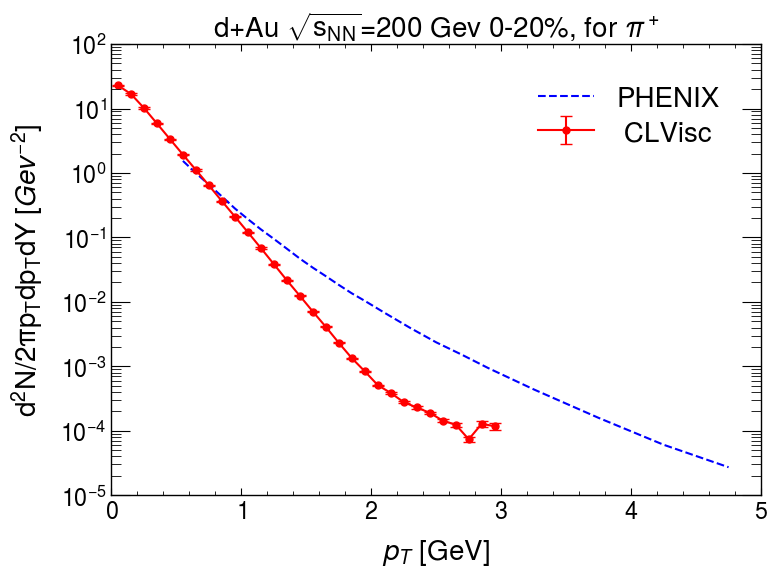

In [8]:
# 使用示例
plot_pt_spectrum(data_exp=pion_plus_0_20, m=0, n=20,pid=211)  # 对于π⁺


In [12]:
def get_pt_spectrum_data(m=0, n=20, pid=321,nsampls=2000):
    """获取pT谱数据而不绘图"""
    base_path = f"/media/mengzhu/west16/d_Au_work/d_Au_DWF/hydro_result_n_BC/ebe_mc_nsampling_{nsampls}/plat_1p3_gw_1p3/entropy3D_y0_4p0_sigma_2p5_L_factor_2p0_R_factor_2p0_P_factor_5p5_alpha_1p0_beta_0p35/dAu200"
    bin_edges = np.linspace(0, 3, 31)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  
    
    event_start = 0
    event_end = 999
    all_pt = []
    all_dN = []

    for event in range(event_start, event_end + 1):
        file_path = os.path.join(base_path, f"{m}_{n}/event{event}/dN_over_2pidYptdpt_mc_{pid}.dat")
        if os.path.exists(file_path):
            try:
                data = np.loadtxt(file_path)
                all_pt.append(data[:, 0])
                all_dN.append(data[:, 1])
            except:
                print(f"Error loading data for event {event}")

    all_pt_flat = np.concatenate(all_pt)
    all_dN_flat = np.concatenate(all_dN)

    bin_indices = np.digitize(all_pt_flat, bin_edges) - 1
    bin_means = np.zeros(len(bin_centers))
    bin_stds = np.zeros(len(bin_centers))
    bin_counts = np.zeros(len(bin_centers))  # 新增：统计每个bin的事件数

    for i in range(len(bin_centers)):
        mask = (bin_indices == i)
        bin_counts[i] = np.sum(mask)  # 计算该bin中的事件数
        if bin_counts[i] > 0:
            bin_means[i] = np.mean(all_dN_flat[mask])
            # 修改误差计算方法：使用 bin_means / sqrt(N)
            bin_stds[i] = bin_means[i] / np.sqrt(bin_counts[i])

    return {
        'bin_centers': bin_centers,
        'bin_means': bin_means,
        'bin_stds': bin_stds,
        'bin_counts': bin_counts,  # 返回计数信息供检查
    }

In [13]:
def plot_combined_centralities(pid=321, centralities=["0_20", "20_40", "40_60"], ylog=True):
    """
    绘制多个中心度的pT谱图
    
    参数:
        pid : 粒子ID (211:π⁺, 2212:p, 321:K⁺)
        centralities : 要绘制中心度列表，如["0_20", "20_40", "40_60"]
        ylog : 是否使用对数y轴
    """
    # 根据PID映射到对应的实验数据
    data_mapping = {
        211: {  # π⁺
            "0_20": pion_plus_0_20,
            "20_40": pion_plus_20_40,
            "40_60": pion_plus_40_60,
            "60_88": pion_plus_60_88,
            "0_100": pion_plus_0_100
        },
        2212: {  # p
            "0_20": proton_plus_0_20,
            "20_40": proton_plus_20_40,
            "40_60": proton_plus_40_60,
            "60_88": proton_plus_60_88,
            "0_100": proton_plus_0_100
        },
        321: {  # K⁺
            "0_20": kaon_plus_0_20,
            "20_40": kaon_plus_20_40,
            "40_60": kaon_plus_40_60,
            "60_88": kaon_plus_60_88,
            "0_100": kaon_plus_0_100
        }
    }
    
    # 粒子信息
    particle_info = {
        211: {'symbol': r'\pi^+', 'name': 'pion'},
        2212: {'symbol': 'p^+', 'name': 'proton'},
        321: {'symbol': 'K^+', 'name': 'kaon'}
    }
    particle = particle_info.get(pid, {'symbol': f'PID{pid}', 'name': f'PID{pid}'})
    
    # 创建图形
    plt.figure(figsize=(8, 6))
    
    # 定义颜色和线型
    colors = ['r', 'g', 'b', 'm', 'c']
    line_styles = ['-', '--', ':', '-.', '-']
    
    # 遍历每个中心度
    for idx, cent in enumerate(centralities):
        # 获取实验数据
        data_exp = data_mapping[pid][cent]
        
        # 解析中心度范围
        m, n = map(int, cent.split('_'))
        
        # 获取模拟数据
        sim_data = get_pt_spectrum_data(m, n, pid)
        
        # 绘制模拟结果
        plt.errorbar(sim_data['bin_centers'], sim_data['bin_means'], 
                     yerr=sim_data['bin_stds'], 
                     fmt=f'{colors[idx]}o{line_styles[idx]}', 
                     markersize=5, linewidth=1.5, capsize=4, 
                     label=f'{m}-{n}% CLVisc')
        
        # 绘制实验数据
        plt.semilogy(data_exp['pT'], data_exp['Yields'], 
                     f'{colors[idx]}--', markersize=5, linewidth=1.5, 
                     label=f'{m}-{n}% PHENIX')

    # 设置坐标轴和标题
    plt.xlim(0,3)
    plt.xlabel(r'$p_T$ [GeV]', fontsize=20, ha='center')
    plt.ylabel(r'$\rm d^2N/2\pi p_T dp_T dY$ $[Gev^{-2}]$', fontsize=20, ha='center')
    plt.title(rf'd+Au $\sqrt{{\rm s_{{\rm NN}}}}$=200 GeV for ${particle["symbol"]}$', fontsize=20)
    
    if ylog:
        plt.yscale('log')
    
    plt.legend(fontsize=16, ncol=1)
    plt.tight_layout()
    plt.show()



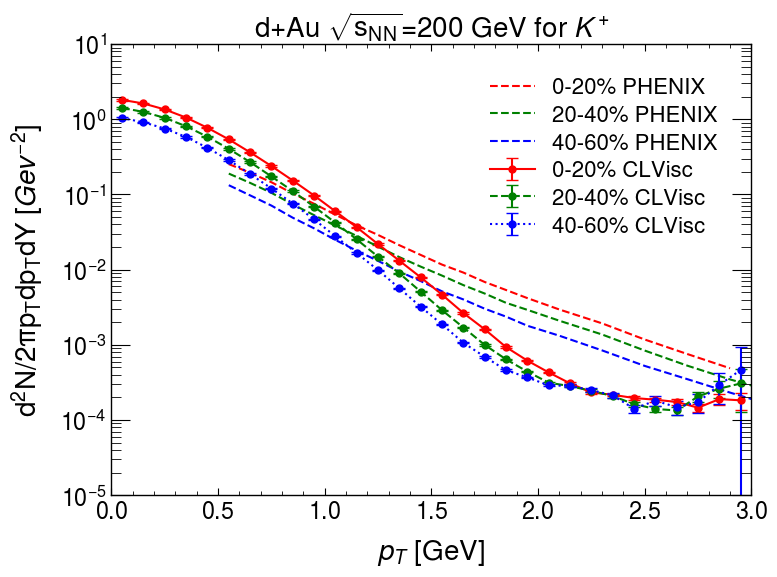

In [14]:
# 使用示例
# 绘制K⁺的0-20%、20-40%、40-60%中心度
plot_combined_centralities(pid=321, centralities=["0_20", "20_40", "40_60"])


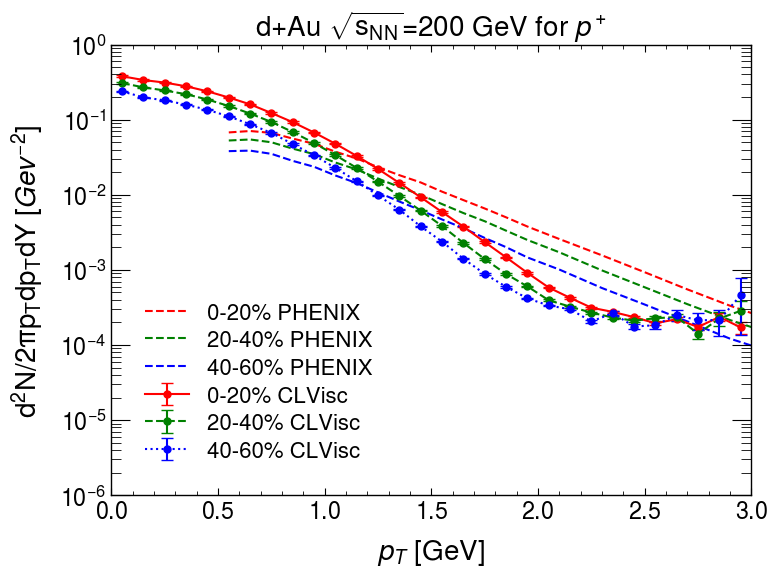

In [15]:
plot_combined_centralities(pid=2212, centralities=["0_20", "20_40", "40_60"])


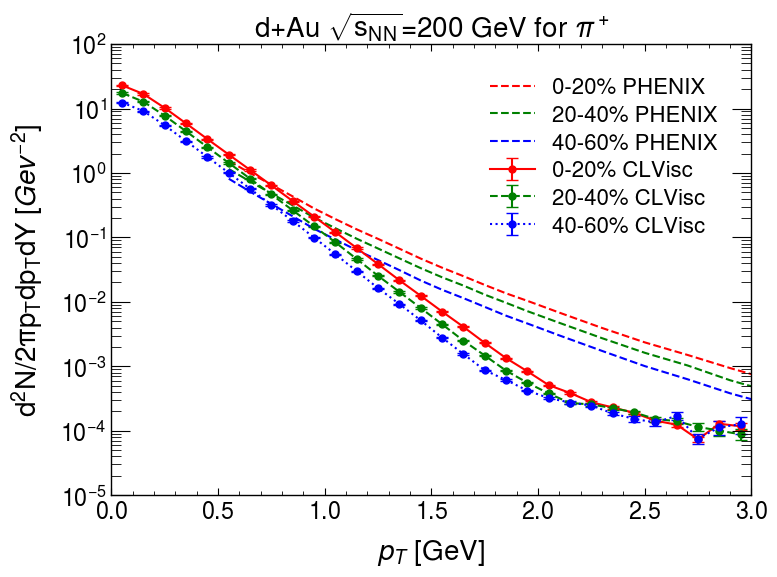

In [16]:
plot_combined_centralities(pid=211, centralities=["0_20", "20_40", "40_60"])


In [19]:
sim_data_0_5_2000 = get_pt_spectrum_data(m=0, n=5, pid=321,nsampls=2000)
sim_data_0_5_4000 = get_pt_spectrum_data(m=0, n=5, pid=321,nsampls=4000)

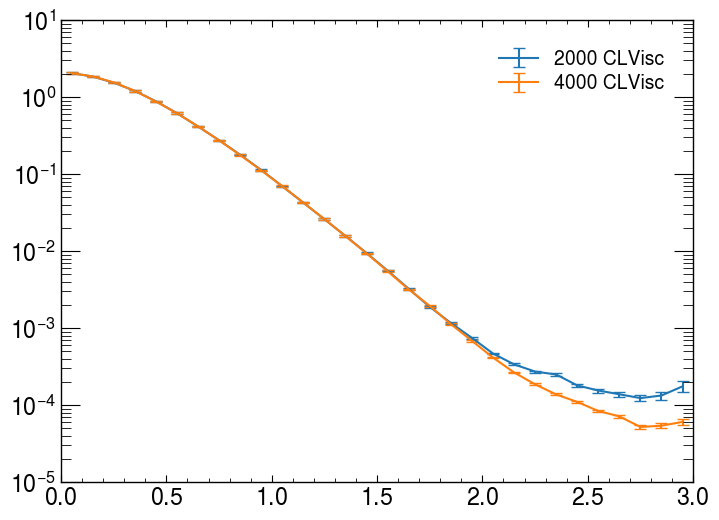

In [20]:
plt.errorbar(sim_data_0_5_2000['bin_centers'], sim_data_0_5_2000['bin_means'], 
             yerr=sim_data_0_5_2000['bin_stds'], 
             markersize=5, linewidth=1.5, capsize=4, 
             label='2000 CLVisc')
plt.errorbar(sim_data_0_5_4000['bin_centers'], sim_data_0_5_4000['bin_means'], 
             yerr=sim_data_0_5_4000['bin_stds'], 
             markersize=5, linewidth=1.5, capsize=4, 
             label='4000 CLVisc')
plt.yscale('log')
plt.legend()


### 根据 particle list文件计算pT谱

In [80]:
particle_list = np.loadtxt('/media/mengzhu/west16/d_Au_work/d_Au_DWF/hydro_result_n_BC_Vn_pT/ebe_mc_nsampling_4000/plat_1p3_gw_1p3/entropy3D_y0_4p0_sigma_2p5_L_factor_2p0_R_factor_2p0_P_factor_5p5_alpha_1p0_beta_0p35/dAu200/0_5/event0/mc_particle_list/mc_particle_list0')

In [95]:
def calculate_rapidity(E, pz):
    """计算快度 y = 0.5*ln((E+pz)/(E-pz))"""
    with np.errstate(divide='ignore', invalid='ignore'):
        y = 0.5 * np.log((E + pz) / (E - pz))
        return np.nan_to_num(y, posinf=10, neginf=-10)

def calculate_pseudorapidity(px, py, pz):
    """计算赝快度 η = -ln[tan(θ/2)] = 0.5*ln((p+pz)/(p-pz))"""
    p = np.sqrt(px**2 + py**2 + pz**2)
    with np.errstate(divide='ignore', invalid='ignore'):
        eta = 0.5 * np.log((p + pz) / (p - pz))
        return np.nan_to_num(eta, posinf=10, neginf=-10)

def calculate_pt_spectrum(data, pid=211, rapidity_cut=0.8, pt_range=(0.1, 4.0), 
                         use_pseudorapidity=False, nsampling=1):
    """
    计算pT谱的核心函数
    
    参数:
        data: 加载的粒子数据数组
        pid: 粒子PDG代码，'charged'表示所有带电粒子
        rapidity_cut: 快度/赝快度截断值（|y|或|η| < cut）
        pt_range: pT范围(GeV/c)
        use_pseudorapidity: 是否使用赝快度替代快度
        nsampling: 事件数（归一化因子）
        
    返回:
        pt_values: pT数组
        spectrum: 归一化谱值
        errors: 统计误差
    """
    # 数据列索引定义（根据您的输出格式）
    POS_X0 = 0    # position.x0()
    POS_X1 = 1    # position.x1()
    POS_X2 = 2    # position.x2()
    POS_X3 = 3    # position.x3()
    MASS = 4      # mass
    MOM_X0 = 5    # momentum.x0() (能量E)
    MOM_X1 = 6    # momentum.x1() (px)
    MOM_X2 = 7    # momentum.x2() (py)
    MOM_X3 = 8    # momentum.x3() (pz)
    PDGCODE = 9   # pdgcode
    PARTICLE_NUM = 10  # particle_number
    CHARGE = 11   # charge
    # 提取基本物理量
    E = data[:, MOM_X0]  # 能量
    px, py, pz = data[:, MOM_X1], data[:, MOM_X2], data[:, MOM_X3]
    pdg = data[:, PDGCODE]
    charge = data[:, CHARGE]
    
    # 计算快度和赝快度
    y = calculate_rapidity(E, pz)
    eta = calculate_pseudorapidity(px, py, pz)
    pt = np.sqrt(px**2 + py**2)  # 横动量
    
    # 粒子选择
    if pid == 'charged':
        selected = (charge != 0)
    else:
        selected = (pdg == pid)
    
    # 快度/赝快度截断
    if use_pseudorapidity:
        rap_selected = np.abs(eta) < rapidity_cut
        rap_label = f"|η| < {rapidity_cut}"
    else:
        rap_selected = np.abs(y) < rapidity_cut
        rap_label = f"|y| < {rapidity_cut}"
    
    # pT范围截断
    pt_selected = (pt >= pt_range[0]) & (pt <= pt_range[1])
    
    # 综合筛选
    final_selected = selected & rap_selected & pt_selected
    
    # 统计pT分布（50个线性bin）
    counts, bin_edges = np.histogram(pt[final_selected], bins=50, range=pt_range)
    pt_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
    bin_widths = bin_edges[1:] - bin_edges[:-1]
    
    # 计算归一化谱 (1/2π) d²N/(pT dpT dy)
    dy_window = 2 * rapidity_cut  # 总快度窗口
    norm_factor = 1 / (2 * np.pi * pt_centers * bin_widths * dy_window * nsampling)
    spectrum = counts * norm_factor
    errors = np.sqrt(counts) * norm_factor
    
    return pt_centers, spectrum, errors, rap_label


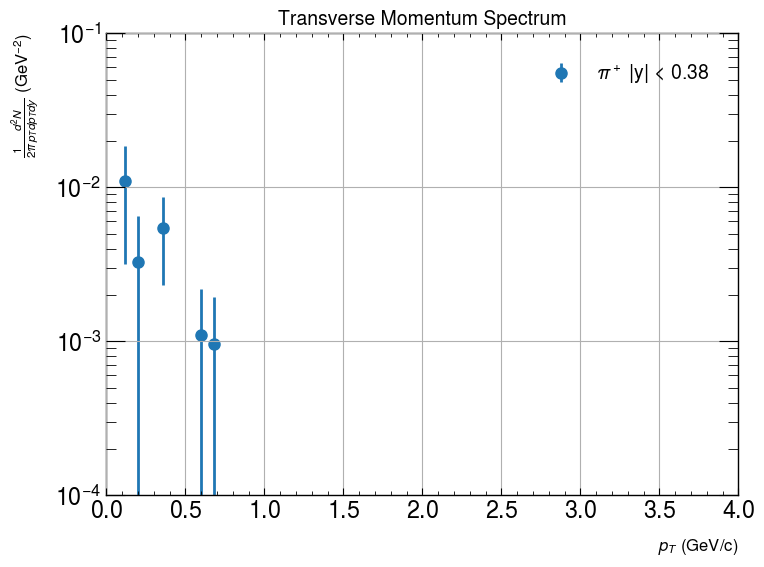

In [97]:
# 示例1：计算π+的pT谱（快度截断）
pt_pi, spec_pi, err_pi, label_pi = calculate_pt_spectrum(
    data=particle_list, pid=211, rapidity_cut=0., pt_range=(0.0, 4.0), 
                         use_pseudorapidity=False, nsampling=4000
)
# 绘制π+谱
plt.figure(figsize=(8, 6))
plt.errorbar(pt_pi, spec_pi, yerr=err_pi, fmt='o', label=rf"$\pi^+$ {label_pi}")
plt.yscale('log')
plt.xlabel(r"$p_T$ (GeV/c)", fontsize=12)
plt.ylabel(r"$\frac{1}{2\pi} \frac{d^2N}{p_T dp_T dy}$ (GeV$^{-2}$)", fontsize=12)
plt.title("Transverse Momentum Spectrum", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
# 示例2：计算带电粒子的pT谱（赝快度截断）
pt_ch, spec_ch, err_ch, label_ch = calculate_pt_spectrum(
    data=particle_list, pid='charged', rapidity_cut=0.8, use_pseudorapidity=True
)

# 绘制带电粒子谱
plt.figure(figsize=(10, 6))
plt.errorbar(pt_ch, spec_ch, yerr=err_ch, fmt='o', label=f"Charged {label_ch}")
plt.yscale('log')
plt.xlabel(r"$p_T$ (GeV/c)", fontsize=12)
plt.ylabel(r"$\frac{1}{2\pi} \frac{d^2N}{p_T dp_T dy}$ (GeV$^{-2}$)", fontsize=12)
plt.title("Transverse Momentum Spectrum", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()


### 复现老师的结果

In [2]:
def calculate_rapidity(E, pz):
    """计算快度 y = 0.5*ln((E+pz)/(E-pz))"""
    with np.errstate(divide='ignore', invalid='ignore'):
        y = 0.5 * np.log((E + pz) / (E - pz))
        return np.nan_to_num(y, posinf=10, neginf=-10)

def calculate_pseudorapidity(px, py, pz):
    """计算赝快度 η = -ln[tan(θ/2)] = 0.5*ln((p+pz)/(p-pz))"""
    p = np.sqrt(px**2 + py**2 + pz**2)
    with np.errstate(divide='ignore', invalid='ignore'):
        eta = 0.5 * np.log((p + pz) / (p - pz))
        return np.nan_to_num(eta, posinf=10, neginf=-10)

In [3]:
# 基础路径
base_path = '/media/mengzhu/west16/d_Au_work/d_Au_DWF/hydro_result_n_BC_Vn_pT/ebe_mc_nsampling_4000/plat_1p3_gw_1p3/entropy3D_y0_4p0_sigma_2p5_L_factor_2p0_R_factor_2p0_P_factor_5p5_alpha_1p0_beta_0p35/dAu200/0_5/event100/mc_particle_list/'

# 初始化空列表存储所有数据
particle_lists = []

# 循环读取4000个文件
for i in range(4000):
    file_path = os.path.join(base_path, f'mc_particle_list{i}')
    if os.path.exists(file_path):
        data = np.loadtxt(file_path)
        particle_lists.append(data)
    else:
        print(f"Warning: File not found - {file_path}")

# 合并所有数据（垂直堆叠）
if particle_lists:
    particle_lists_combined = np.vstack(particle_lists)
    print(f"成功合并 {len(particle_lists)} 个文件，总粒子数: {len(particle_lists_combined)}")
else:
    print("未找到任何有效文件！")

成功合并 4000 个文件，总粒子数: 1388774


In [4]:
particle_lists = np.vstack(particle_lists)

In [5]:
particle_lists = particle_lists[particle_lists[:, -1] != 0]

In [6]:
particle_lists.shape

(829857, 12)

In [7]:
# 数据列索引定义（根据您的输出格式）
POS_X0 = 0    # position.x0()
POS_X1 = 1    # position.x1()
POS_X2 = 2    # position.x2()
POS_X3 = 3    # position.x3()
MASS = 4      # mass
MOM_X0 = 5    # momentum.x0() (能量E)
MOM_X1 = 6    # momentum.x1() (px)
MOM_X2 = 7    # momentum.x2() (py)
MOM_X3 = 8    # momentum.x3() (pz)
PDGCODE = 9   # pdgcode
PARTICLE_NUM = 10  # particle_number
CHARGE = 11   # charge

# 提取基本物理量
E = particle_lists[:, MOM_X0]  # 能量
px, py, pz = particle_lists[:, MOM_X1], particle_lists[:, MOM_X2], particle_lists[:, MOM_X3]
pdg = particle_lists[:, PDGCODE].astype(int)  # 提前转换
charge = particle_lists[:, CHARGE]

# 计算快度和赝快度
y = calculate_rapidity(E, pz)
eta = calculate_pseudorapidity(px, py, pz)
# 提取数据时直接转换pdg为整数

dat = np.array([E, px, py, pz, y, pdg, eta]).T  # 允许混合类型
dat[:, 5] = dat[:, 5].astype(int)


In [8]:
dat.shape

(829857, 7)

In [9]:
dat[0]

array([ 40.95178279,   0.26510548,   0.31305271, -40.94949024,
        -5.24180271, 211.        ,  -5.29656598])

In [10]:
kind = 'Eta'
pid = 211

E = dat[:,0]
pz = dat[:,3]
rapidity_col = 4
if kind == 'Eta':
    rapidity_col = 6

particle_type = None

if pid == 'charged':
    particle_type = (dat[:, 5]==dat[:, 5])
else:
    particle_type = (dat[:, 5]==pid)

In [11]:
particle_type

array([ True, False,  True, ...,  True, False,  True])

In [12]:
Yi = dat[particle_type, rapidity_col]

In [13]:
Yi

array([-5.29656598, -7.00351149, -1.70409804, ..., -4.83027633,
       -0.227925  , -2.18272088])

In [14]:
dN, Y = np.histogram(Yi, bins=50)

In [15]:
Y

array([-11.30735941, -10.89854134, -10.48972326, -10.08090519,
        -9.67208712,  -9.26326905,  -8.85445098,  -8.44563291,
        -8.03681484,  -7.62799677,  -7.2191787 ,  -6.81036063,
        -6.40154256,  -5.99272449,  -5.58390642,  -5.17508835,
        -4.76627027,  -4.3574522 ,  -3.94863413,  -3.53981606,
        -3.13099799,  -2.72217992,  -2.31336185,  -1.90454378,
        -1.49572571,  -1.08690764,  -0.67808957,  -0.2692715 ,
         0.13954657,   0.54836464,   0.95718272,   1.36600079,
         1.77481886,   2.18363693,   2.592455  ,   3.00127307,
         3.41009114,   3.81890921,   4.22772728,   4.63654535,
         5.04536342,   5.45418149,   5.86299956,   6.27181763,
         6.68063571,   7.08945378,   7.49827185,   7.90708992,
         8.31590799,   8.72472606,   9.13354413])

In [16]:
dN

array([    4,     4,     6,    17,    43,    84,   180,   434,   983,
        2082,  4015,  6472,  8078,  9508, 10662, 12038, 12548, 13518,
       14700, 15341, 16291, 16677, 17018, 16651, 15789, 14866, 13499,
       12655, 12098, 11855, 11440, 11026, 10045,  8616,  6650,  4968,
        3567,  2260,  1335,   669,   319,   174,    71,    37,    16,
           6,     2,     1,     0,     2])

In [17]:
dY = (Y[1:]-Y[:-1])
Y = 0.5*(Y[:-1]+Y[1:])

In [18]:
dY

array([0.40881807, 0.40881807, 0.40881807, 0.40881807, 0.40881807,
       0.40881807, 0.40881807, 0.40881807, 0.40881807, 0.40881807,
       0.40881807, 0.40881807, 0.40881807, 0.40881807, 0.40881807,
       0.40881807, 0.40881807, 0.40881807, 0.40881807, 0.40881807,
       0.40881807, 0.40881807, 0.40881807, 0.40881807, 0.40881807,
       0.40881807, 0.40881807, 0.40881807, 0.40881807, 0.40881807,
       0.40881807, 0.40881807, 0.40881807, 0.40881807, 0.40881807,
       0.40881807, 0.40881807, 0.40881807, 0.40881807, 0.40881807,
       0.40881807, 0.40881807, 0.40881807, 0.40881807, 0.40881807,
       0.40881807, 0.40881807, 0.40881807, 0.40881807, 0.40881807])

In [19]:
Y

array([-11.10295037, -10.6941323 , -10.28531423,  -9.87649616,
        -9.46767809,  -9.05886002,  -8.65004195,  -8.24122388,
        -7.83240581,  -7.42358773,  -7.01476966,  -6.60595159,
        -6.19713352,  -5.78831545,  -5.37949738,  -4.97067931,
        -4.56186124,  -4.15304317,  -3.7442251 ,  -3.33540703,
        -2.92658896,  -2.51777089,  -2.10895282,  -1.70013474,
        -1.29131667,  -0.8824986 ,  -0.47368053,  -0.06486246,
         0.34395561,   0.75277368,   1.16159175,   1.57040982,
         1.97922789,   2.38804596,   2.79686403,   3.2056821 ,
         3.61450017,   4.02331825,   4.43213632,   4.84095439,
         5.24977246,   5.65859053,   6.0674086 ,   6.47622667,
         6.88504474,   7.29386281,   7.70268088,   8.11149895,
         8.52031702,   8.92913509])

In [20]:
dat[particle_type, 1]

array([ 0.26510548, -0.50831728,  0.25125966, ..., -0.08341685,
       -0.46380768, -0.09190178])

In [21]:
dat[particle_type, 1]**2

array([0.07028091, 0.25838646, 0.06313142, ..., 0.00695837, 0.21511757,
       0.00844594])

In [22]:
pti = np.sqrt(dat[particle_type, 1]**2+dat[particle_type, 2]**2)

In [23]:
pti

array([0.41022301, 0.53640933, 0.31394051, ..., 0.28174179, 0.49533097,
       0.10557147])

In [24]:
rapidity_window = 1
pti = pti[np.abs(Yi)<0.5*rapidity_window]

In [25]:
pti

array([0.14559857, 0.7639044 , 0.3174946 , ..., 0.07463893, 0.26740337,
       0.49533097])

In [26]:
dN, pt = np.histogram(pti, bins=50,range=[0, 5]) # 统计pT0-4范围的粒子

In [27]:
pt

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. ])

In [28]:
dN

array([1320, 4945, 6085, 5240, 4136, 2957, 2057, 1397,  959,  571,  406,
        254,  159,   87,   74,   38,   31,    9,   11,    8,    7,    2,
          2,    1,    0,    1,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0])

In [29]:
dpt = pt[1:]-pt[:-1]
pt = 0.5*(pt[1:]+pt[:-1])

In [30]:
dpt

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

In [31]:
pt

array([0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95, 1.05,
       1.15, 1.25, 1.35, 1.45, 1.55, 1.65, 1.75, 1.85, 1.95, 2.05, 2.15,
       2.25, 2.35, 2.45, 2.55, 2.65, 2.75, 2.85, 2.95, 3.05, 3.15, 3.25,
       3.35, 3.45, 3.55, 3.65, 3.75, 3.85, 3.95, 4.05, 4.15, 4.25, 4.35,
       4.45, 4.55, 4.65, 4.75, 4.85, 4.95])

In [32]:
nsampling = 4000
res = np.array([pt, dN/(2*np.pi*float(nsampling)*pt*dpt*rapidity_window)]).T

In [33]:
res

array([[5.00000000e-02, 1.05042262e+01],
       [1.50000000e-01, 1.31170199e+01],
       [2.50000000e-01, 9.68457829e+00],
       [3.50000000e-01, 5.95694216e+00],
       [4.50000000e-01, 3.65702691e+00],
       [5.50000000e-01, 2.13918712e+00],
       [6.50000000e-01, 1.25916045e+00],
       [7.50000000e-01, 7.41131518e-01],
       [8.50000000e-01, 4.48910560e-01],
       [9.50000000e-01, 2.39151243e-01],
       [1.05000000e+00, 1.53849778e-01],
       [1.15000000e+00, 8.78812077e-02],
       [1.25000000e+00, 5.06112719e-02],
       [1.35000000e+00, 2.56416297e-02],
       [1.45000000e+00, 2.03059755e-02],
       [1.55000000e+00, 9.75465780e-03],
       [1.65000000e+00, 7.47545945e-03],
       [1.75000000e+00, 2.04627784e-03],
       [1.85000000e+00, 2.36581672e-03],
       [1.95000000e+00, 1.63235839e-03],
       [2.05000000e+00, 1.35863976e-03],
       [2.15000000e+00, 3.70127775e-04],
       [2.25000000e+00, 3.53677651e-04],
       [2.35000000e+00, 1.69313769e-04],
       [2.450000

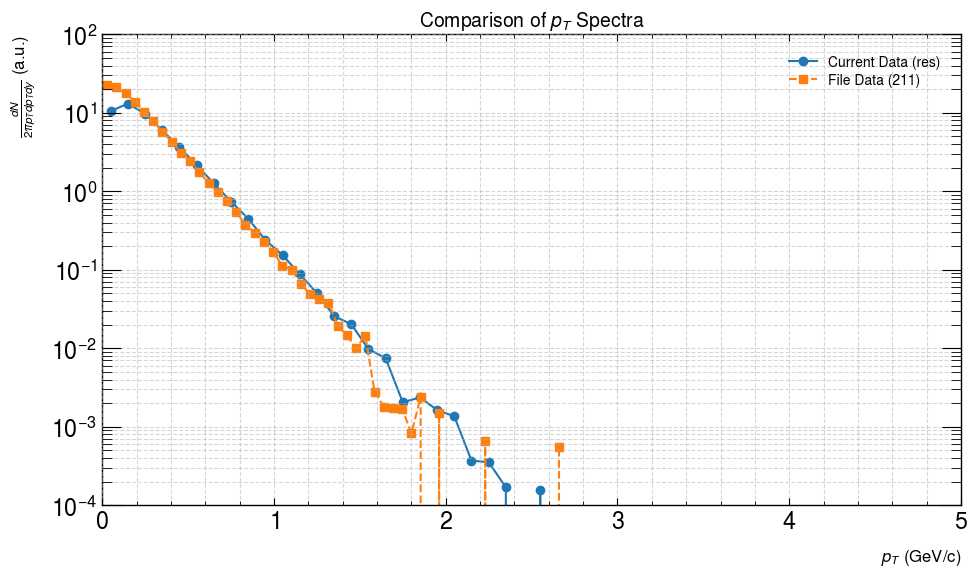

In [35]:
# 从文件加载数据
data_path = '/media/mengzhu/west16/d_Au_work/d_Au_DWF/hydro_result_n_BC/ebe_mc_nsampling_2000/plat_1p3_gw_1p3/entropy3D_y0_4p0_sigma_2p5_L_factor_2p0_R_factor_2p0_P_factor_5p5_alpha_1p0_beta_0p35/dAu200/0_20/event0/dN_over_2pidYptdpt_mc_211.dat'
file_data = np.loadtxt(data_path)

# 2. 提取数据列
# 从res数据
pT_res = res[:, 0]
yield_res = res[:, 1]

# 从文件数据
pT_file = file_data[:, 0]
yield_file = file_data[:, 1]

# 3. 创建图形
plt.figure(figsize=(10, 6))

# 绘制res数据
plt.plot(pT_res, yield_res, 
         marker='o', linestyle='-', linewidth=1.5, markersize=6,
         label='Current Data (res)')

# 绘制文件数据
plt.plot(pT_file, yield_file,
         marker='s', linestyle='--', linewidth=1.5, markersize=6,
         label='File Data (211)')

# 4. 设置图形属性
plt.yscale('log')  # y轴对数坐标
plt.xlabel(r'$p_T$ (GeV/c)', fontsize=12)
plt.ylabel(r'$\frac{dN}{2\pi p_T dp_T dy}$ (a.u.)', fontsize=12)
plt.title('Comparison of $p_T$ Spectra', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, which='both', linestyle='--', alpha=0.5)

# 处理零值问题（对数坐标不能有零）
plt.ylim(bottom=max(1e-4, min(yield_res[yield_res>0].min(), yield_file[yield_file>0].min())*0.1))

# 5. 显示和保存
plt.tight_layout()
plt.savefig('pT_spectra_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

In [60]:
def get_ptspec(dat, pid=211, nsampling=2000, kind='Y', rapidity_window=1.6):
    E = dat[:,0]
    pz = dat[:,3]
    rapidity_col = 4
    if kind == 'Eta':
        rapidity_col = 6

    particle_type = None

    if pid == 'charged':
        particle_type = (dat[:, 5]==dat[:, 5])
    else:
        particle_type = (dat[:, 5]==pid)

    Yi = dat[particle_type, rapidity_col]

    dN, Y = np.histogram(Yi, bins=50)

    dY = (Y[1:]-Y[:-1])
    Y = 0.5*(Y[:-1]+Y[1:])

    pti = np.sqrt(dat[particle_type, 1]**2+dat[particle_type, 2]**2)

    pti = pti[np.abs(Yi)<0.5*rapidity_window]

    dN, pt = np.histogram(pti, bins=50)

    dpt = pt[1:]-pt[:-1]
    pt = 0.5*(pt[1:]+pt[:-1])

    res = np.array([pt, dN/(2*np.pi*float(nsampling)*pt*dpt*rapidity_window)]).T

    return res

In [ ]:
res = get_ptspec(dat, pid=211, nsampling=2000, kind='Y', rapidity_window=1.6)